## 1. Problem Statement
---

- Exploring publicly available data from __LendingClub.com__.

- Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.

  - To create a model that will help predict people who have a profile of having a __high probability of paying back__.

  
  - This data is from _before they even went public_.

### 1.1. Objective:
- The project aims to classify and predict whether borrowers will fully repay their loans or not.

## 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   

In [2]:
from sklearn.model_selection import train_test_split                             
from sklearn.model_selection import cross_val_score                              
from sklearn.tree import DecisionTreeClassifier                                   

from sklearn.metrics import precision_recall_curve                                
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## 3. Data Acquisition

In [3]:
data = pd.read_csv('/kaggle/input/lending-club-data/loan_data.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0




## 4. Data Description

- The dataset has been provided by lending club and its description is shown below in the table.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9578 | 14 | 733 KB | 

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**credit.policy**|1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.|
|02|**purpose**|The purpose to get the loan.|
|03|**int.rate**|	The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). |
|||Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.|
|04|**installment**|The monthly installments owed by the borrower if the loan is funded.|
|05|**log.annual.inc**|The natural log of the self-reported annual income of the borrower.|
|06|**dti**|The debt-to-income ratio of the borrower (amount of debt divided by annual income).|
|07|**fico**|The FICO credit score of the borrower.|
|08|**days.with.cr.line**|The number of days the borrower has had a credit line.|
|09|**revol.bal**|The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).|
|10|**revol.util**|The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).|
|11|**inq.last.6mths**|The borrower's number of inquiries by creditors in the last 6 months.|
|12|**delinq.2yrs**|The number of times the borrower had been 30+ days past due on a payment in the past 2 years.|
|13|**pub.rec**|The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).|
|14|**not.fully.paid**|Whether the loan amount fully paid or not.|


## 5. Data Preprocessing

In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Observations:**

> **credit.policy:**
- We observe that nearly three-quarters of the data in the field 'credit.policy' have a value of **1**, with a mean of 0.80, indicating a close proximity to 1.
- Implies that majority of the customers meets the criteria of lending club.

> **int.rate:**
- The average interest rate is **12.26%**.
- 25% of the customers are bound with the interest rate of 10.4%
- 50% of the customers are bound with the interest rate of 12.2%.
- 75% of the customers are bound with the interest rate of 14%.

> **dti:**
- The majority **(75%)** of customers exhibit a debt equivalent to **17.9%** of their respective income.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation:**

- We observe the absence of **null data**, and all features have the correct data types.

- Function that transforms credit.policy and not.fully.paid to correct data type.

In [6]:
def transformdtype(feature=None, type=None):
      data[feature] = data[feature].astype(type)

In [7]:
transformdtype(feature = 'credit.policy', type = 'int')
transformdtype(feature = 'not.fully.paid', type = 'int')

## 6. Exploratory Data Analysis

- Function that generates distribution of fico feature for each credit policy.

In [8]:
def ficoandcredpol(data=None):
    plt.figure(figsize = (15,7))
    sns.histplot(data= data, x= 'fico', hue= 'credit.policy', kde =True)
    
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel('Fico', size=14)
    plt.ylabel('Credit Policy', size =14)
    plt.title(label='Frequency Distribution of Fico vs Credit Policy', size=16)
    plt.show()

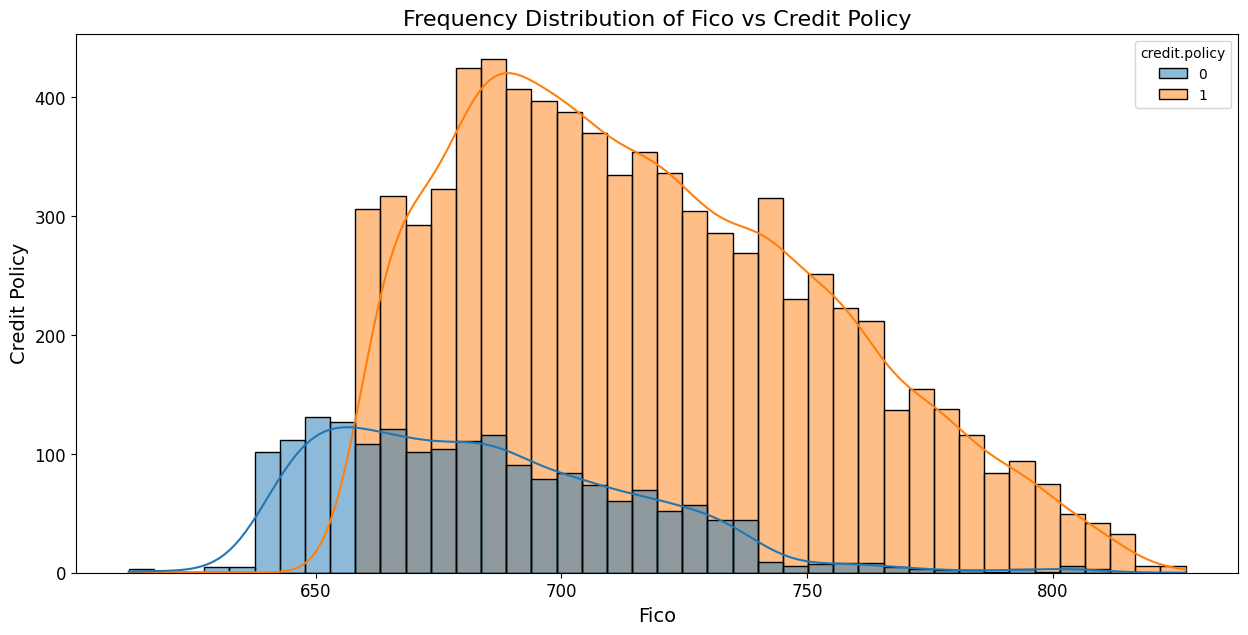

In [9]:
ficoandcredpol(data)

- Function that generates distribution of fico feature concerning not fully paid feature.</h4>

In [10]:
def ficonotfullypaid(data=None):
    plt.figure(figsize = (15,8))
    sns.histplot(data= data, x = 'fico', hue = 'not.fully.paid', kde =True)
    
    plt.xticks(size=12)
    plt.yticks(size=12)    
    plt.xlabel('Fico', size=14)
    plt.ylabel('Not Fully Paid', size =14)
    plt.title(label='Frequency Distribution of Fico vs Not Fully Paid', size=16)
    plt.show()

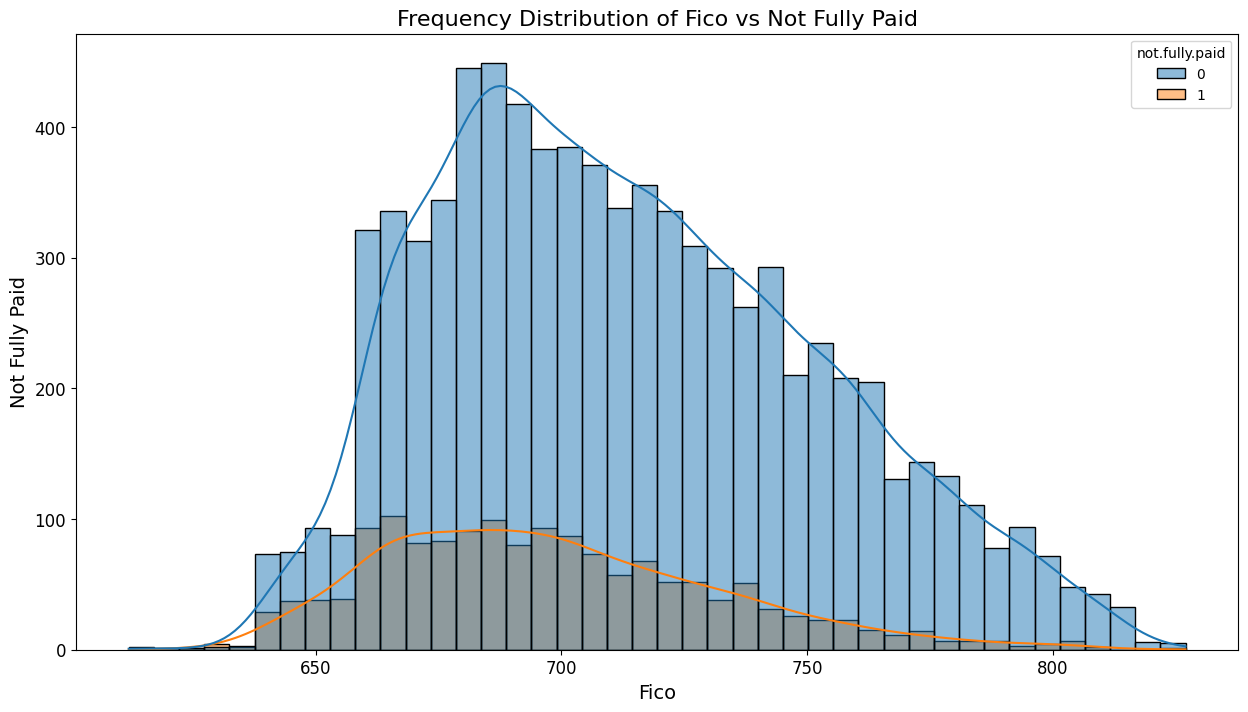

In [11]:
ficonotfullypaid(data)

- Function that shows distribution of purpose along the data.

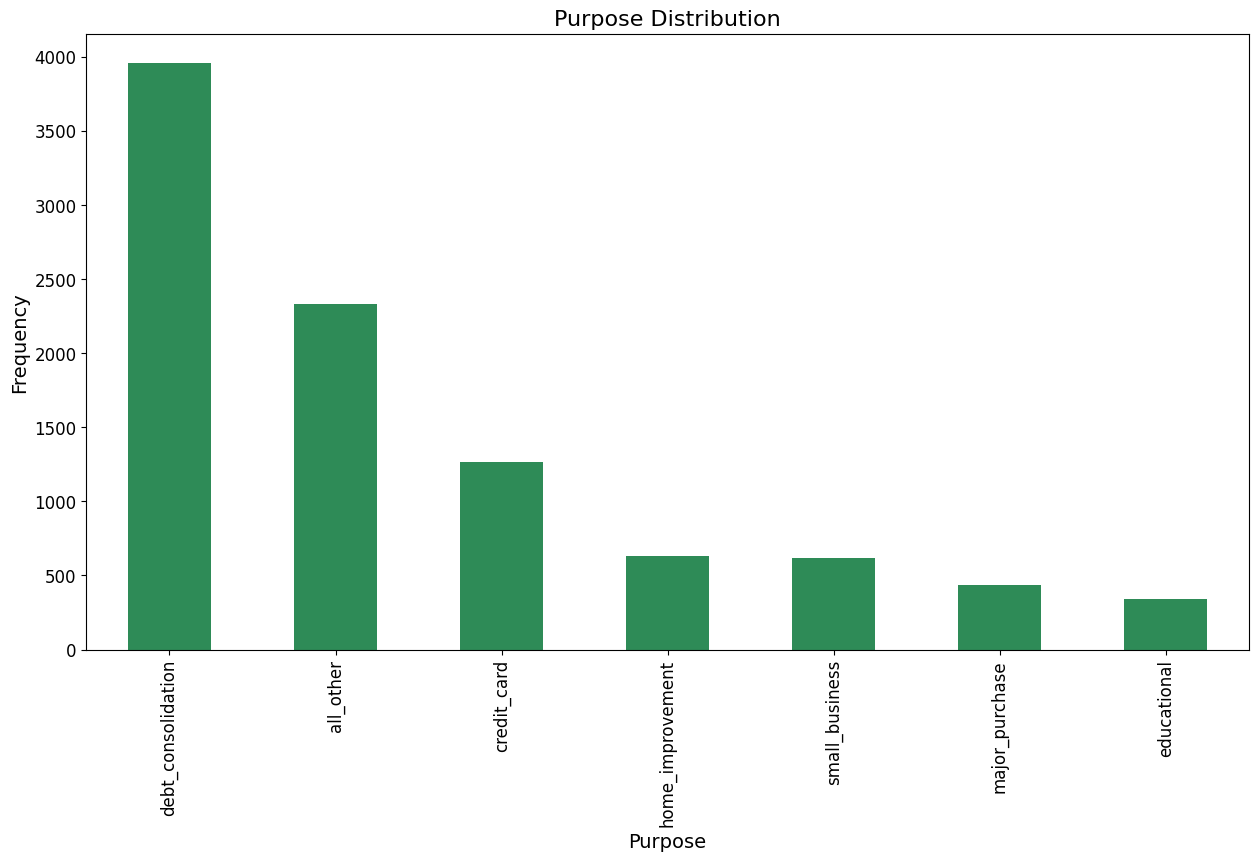

In [12]:
plt.figure(figsize = (15,8))
data['purpose'].value_counts().plot.bar(color='seagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Purpose', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label='Purpose Distribution', size=16)
plt.show()

- Function that shows association between purpose and not fully paid feature.

In [13]:
def purposenotfullypaid(data=None):
    plt.figure(figsize = (15,8))
    sns.countplot(x = 'purpose', hue = 'not.fully.paid', data=data)
    plt.legend(labels=['Purpose Not Fully Paid 0', 'Purpose Not Fully Paid 1'])
    
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel(xlabel='Purpose', size=14)
    plt.ylabel(ylabel='Frequency', size=14)
    plt.title(label='Purpose vs Not Fully Paid', size=16)
    plt.show()

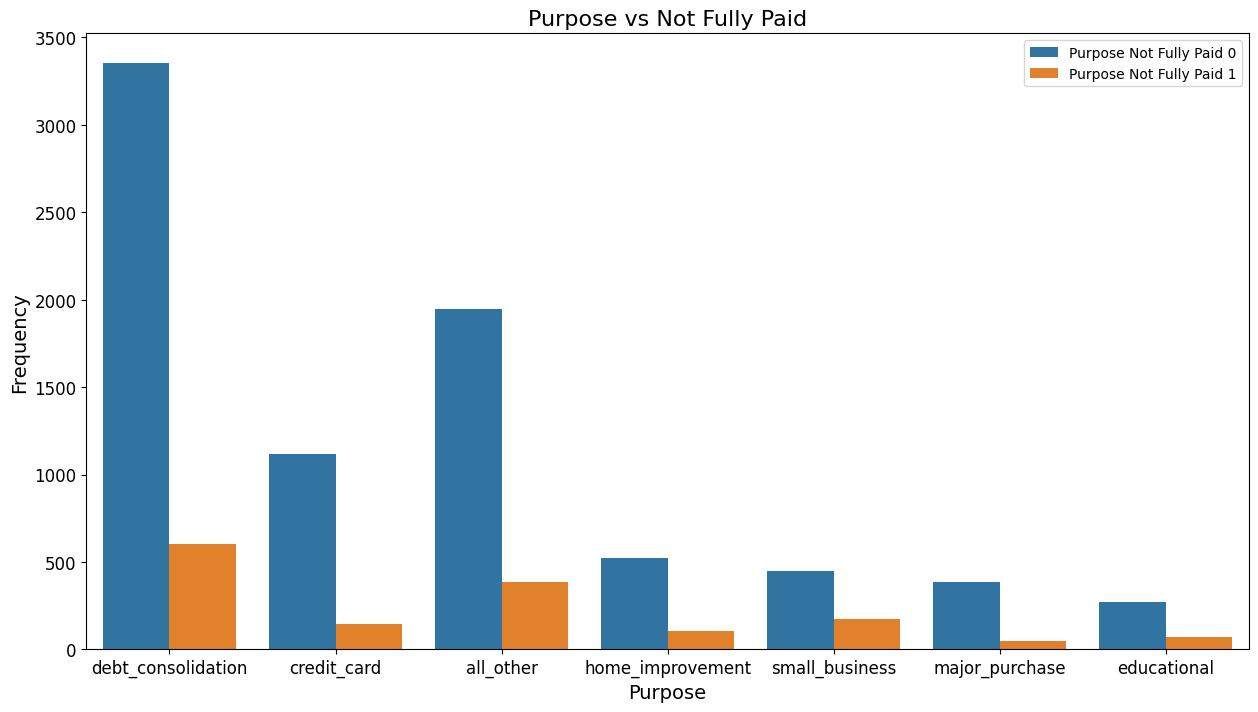

In [14]:
purposenotfullypaid(data)

## 7. Data Post-Processing

### 7.1 Feature Encoding

In [15]:
data_p = pd.get_dummies(data=data, columns = ['purpose'])
data_p.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


- One Hot Encoding returned boolean values in the required fields.
- Converting boolean to integer manually.

In [16]:
data_p.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [17]:
data_p['purpose_all_other'] = data_p['purpose_all_other'].astype(int) 

In [18]:
data_p['purpose_all_other']

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    0
9576    0
9577    0
Name: purpose_all_other, Length: 9578, dtype: int64

In [19]:
col_list_new = data_p.columns
col_list_new

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [20]:
col_list_new[13:]

Index(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [21]:
col_list_purpose = col_list_new[13:]
col_list_purpose

Index(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [22]:
for i in col_list_purpose:
    data_p[i] = data_p[i].astype(int)

In [23]:
data_p.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [24]:
data = data_p

In [25]:
data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0


### 7.2 Feature Scaling

- Function that performs standard scaling over the following set of features (independent variables).</h4>

> int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util.

In [26]:
X = data.drop(labels='not.fully.paid', axis=1)
y = data['not.fully.paid']

scaler_labels = ['int.rate','installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
print(X.shape)
print(y.shape)

(9578, 19)
(9578,)


In [27]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [28]:
def datascaler(data=None, labels=None):
    scaler = StandardScaler()
    Xtrans = scaler.fit_transform(data[labels])
    scaled_df = pd.DataFrame(data = Xtrans, columns = labels)
    return scaled_df

In [29]:
X_scaled = datascaler(data=data, labels=scaler_labels)
X_scaled.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586


In [30]:
X_scaled.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util'],
      dtype='object')

- Function that concats scaled dataframe and dataframe that contains features apart from scalerlabels.


In [31]:
X.drop(labels=scaler_labels, axis=1).head()

,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0


In [32]:
X_remvals = X.drop(labels=scaler_labels, axis=1)
X_remvals.head()

,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0


In [33]:
X_scaled.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586


In [34]:
def concatscaled():
    final_data = pd.concat(objs =[X_scaled, X_remvals], axis=1)
    return final_data

In [35]:
final_data = concatscaled()
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,1,0,0,0,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,1,0,0,0,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,1,0,0,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,1,0,0,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,1,0,1,0,0,1,0,0,0,0,0


- Function that prepares the data according to the required Train-Test split.

In [36]:
def data_prep(input=None, output=None):
    X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.20, random_state=42)
    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = data_prep(input = final_data, output = y)

In [38]:
print(y.shape)
y.head()

(9578,)


0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7662, 19)
(1916, 19)
(7662,)
(1916,)


## 8. Model Development & Evaluation


- In this section, we are developing a decision tree-based model.

- For **evaluation purposes** we are focussing on the **precision and recall score**.

- Here, we are trying to **generalize results** i.e. same results or error on testing data as that of training data.

In [40]:
clf_n = DecisionTreeClassifier(random_state = 0)
clf_n.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
y_train_pred = clf_n.predict(X_train)
y_test_pred = clf_n.predict(X_test)

In [42]:
confusion_matrix1 = pd.DataFrame(confusion_matrix(y_train, y_train_pred))

confusion_matrix1.index = ['Actually not fully paid', 'Fully paid']
confusion_matrix1.columns = ['Predicted not fully paid', 'Predictrd Fully paid']
print(confusion_matrix1)

                         Predicted not fully paid  Predictrd Fully paid
Actually not fully paid                      6434                     0
Fully paid                                      0                  1228


In [43]:
confusion_matrix1 = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

confusion_matrix1.index = ['Actually not fully paid', 'Fully paid']
confusion_matrix1.columns = ['Predicted not fully paid', 'Predictrd Fully paid']
print(confusion_matrix1)

                         Predicted not fully paid  Predictrd Fully paid
Actually not fully paid                      1348                   263
Fully paid                                    227                    78


**Observations:**

- **Train Data:**
  - Model predicted **6434** instances correctly for **negative class** while **1228** instances were predicted **correctly** for **positive class**.
  - Model **identified 0** instances negative but in actual they **were positive**.
  - Model **identified 0** instances positive but in actual they **were negative**.

- **Test Data:**
  - Model predicted **1348** instances correctly for **negative class** while **78** instances were predicted **correctly** for **positive class**.
  - Model **identified 263** instances negative but in actual it **was positive**.
  - Model **identified 227** instances positive but in actual they **were negative**.

- A total of **1348+78 = 1426** are the correct predictions and **227+263 = 490** are the false predictions.

- Function that generates a classification report using the decision tree classifier developed above.

In [44]:
def getclassreport():
    
    y_train_pred = clf_n.predict(X_train)
    y_test_pred = clf_n.predict(X_test)
    
    Training_report = classification_report(y_train, y_train_pred)
    Testing_report = classification_report(y_test, y_test_pred)
       
    print('Training Report')
    print(Training_report)
    print('Testing Report')
    print(Testing_report)
    return 

In [45]:
getclassreport()                   #clasificication report

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6434
           1       1.00      1.00      1.00      1228

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

Testing Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1611
           1       0.23      0.26      0.24       305

    accuracy                           0.74      1916
   macro avg       0.54      0.55      0.54      1916
weighted avg       0.76      0.74      0.75      1916



In [46]:
accuracy_score(y_train, y_train_pred)

1.0

In [47]:
accuracy_score(y_test, y_test_pred)

0.744258872651357

- A clear scenario of overfitting is evident, as the model significantly underperformed on unseen testing data.

**Observations:**

- We can observe that **Training results** are **too good** to be true and the **Testing results** are mediocre. This is called **overfitting**.

- On the test data report we can see that **class 0** is **performing well** while **class 1 is not**.

- To **overcome** this problem, we are going to utilise **Hyper Parameter Tuning** with **cross validation**.

## 9. Hyper Parameter Tuning

- The **parameters** we are adjusting to enhance our model's performance.

In [48]:
param_dist = {'criterion':['gini','entropy'], 
              'max_depth':[1,2,3,4,5,6,7, None],
             'max_leaf_nodes':[2,3]}

In [49]:
grid = GridSearchCV(clf_n, param_grid = param_dist, cv = 10, n_jobs = -1)

In [50]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_leaf_nodes': [2, 3]})

In [51]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2}

- These parameters represent the optimal configuration within our specified set, showcasing maximum model efficiency.

In [52]:
grid.best_score_

0.8397285548456057

In [53]:
y_test_pred2 = grid.predict(X_test)

In [54]:
y_train_pred2 = grid.predict(X_train)

In [55]:
print('Testing Accuracy', accuracy_score(y_test, y_test_pred2))

Testing Accuracy 0.8408141962421712


In [56]:
print('Training Accuracy', accuracy_score(y_train, y_train_pred2))

Training Accuracy 0.8397285304098147


In [57]:
print('Difference b/w Training accuracy & Testing accuracy is', (accuracy_score(y_test, y_test_pred2) - accuracy_score(y_train, y_train_pred2)))

Difference b/w Training accuracy & Testing accuracy is 0.001085665832356586


- The difference between training and testing accuracy is now less than **5%**, indicating **successful resolution of Overfitting**. The model has achieved a **Balanced fit**.

In [58]:
confusion_matrix(y_test, y_test_pred2)

array([[1611,    0],
       [ 305,    0]])

In [59]:
cm2 = pd.DataFrame(confusion_matrix(y_test, y_test_pred2))

cm2.index = ['Actually not fully paid', 'Fully paid']
cm2.columns = ['Predicted not fully paid', 'Predictrd Fully paid']
print(cm2)

                         Predicted not fully paid  Predictrd Fully paid
Actually not fully paid                      1611                     0
Fully paid                                    305                     0


- **1611** are the correct predictions and **305** are the false predictions.

## 10. Summarization

**Observations:**

- We conducted **Encoding** and **Scaling** on our **data** to ensure it does not impact our model outcome.
- We split the data into traditional train_test_split and developed a **Decision Tree** model.
- We encountered **Overfitting** issues and observed suboptimal results on the test set due to **undersampled data**.
- By leveraging hyperparameter tuning through **GridSearchCV**, the testing accuracy experienced a substantial improvement, rising from **0.74** to **0.84**.
- This enhancement underscores the model's efficiency when applied to previously **unseen data**.
- **Correct predictions** increased from **1426** to **1611**, while the **Incorrect predictions** decreased from **490** to **305**.
 